In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
path = '/content/athlete_events.csv'

athlete_events = pd.read_csv(path, quotechar='"', na_values='NA')


In [8]:
unique_sports = athlete_events['Sport'].unique()
print("List of all recorded sports in the dataset:")
print(unique_sports)

List of all recorded sports in the dataset:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [10]:
individual_sports = ['Judo', 'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Luge', 'Boxing',
                     'Taekwondo', 'Golf', 'Trampolining', 'Triathlon', 'Skeleton', 'Modern Pentathlon']

team_sports = ['Basketball', 'Football', 'Tug-Of-War', 'Ice Hockey', 'Handball', 'Water Polo',
               'Hockey', 'Volleyball', 'Synchronized Swimming', 'Baseball', 'Beach Volleyball',
               'Rugby Sevens', 'Rugby', 'Lacrosse', 'Polo', 'Cricket', 'Softball', 'Curling']

both_types_sports = ['Swimming', 'Athletics', 'Cycling', 'Fencing', 'Equestrianism', 'Shooting',
                     'Archery', 'Table Tennis', 'Badminton', 'Gymnastics', 'Biathlon', 'Rowing',
                     'Canoeing', 'Sailing', 'Bobsleigh', 'Speed Skating', 'Cross Country Skiing',
                     'Figure Skating', 'Short Track Speed Skating', 'Diving', 'Freestyle Skiing',
                     'Snowboarding', 'Ski Jumping']

individual_df = athlete_events[athlete_events['Sport'].isin(individual_sports)]
team_df = athlete_events[athlete_events['Sport'].isin(team_sports)]

ambiguous_df = athlete_events[athlete_events['Sport'].isin(both_types_sports)]
ambiguous_individual_df = ambiguous_df[ambiguous_df['Event'].str.contains("Individual", case=False, na=False)]
ambiguous_team_df = ambiguous_df[ambiguous_df['Event'].str.contains("Team", case=False, na=False)]

final_individual_df = pd.concat([individual_df, ambiguous_individual_df])
final_team_df = pd.concat([team_df, ambiguous_team_df])

unclassified_df = pd.merge(athlete_events, pd.concat([final_individual_df, final_team_df]),
                           how='outer', indicator=True).query('_merge == "left_only"')
unclassified_df['Type'] = unclassified_df['Name'].apply(lambda x: 'Team' if '""' in x else 'Individual')

new_individual_df = unclassified_df[unclassified_df['Type'] == 'Individual']
new_team_df = unclassified_df[unclassified_df['Type'] == 'Team']

final_individual_df = pd.concat([final_individual_df, new_individual_df])
final_team_df = pd.concat([final_team_df, new_team_df])

print("Final Individual Sports Data:")
print(final_individual_df)
print("\nFinal Team Sports Data:")
print(final_team_df)


Final Individual Sports Data:
            ID                          Name Sex   Age  Height  Weight  \
1            2                      A Lamusi   M  23.0   170.0    60.0   
59          20            Kjetil Andr Aamodt   M  20.0   176.0    85.0   
60          20            Kjetil Andr Aamodt   M  20.0   176.0    85.0   
61          20            Kjetil Andr Aamodt   M  20.0   176.0    85.0   
62          20            Kjetil Andr Aamodt   M  20.0   176.0    85.0   
...        ...                           ...  ..   ...     ...     ...   
271105  135563     Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   
271110  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271111  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271116  135571            Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271117  135571            Tomasz Ireneusz ya   M  34.0   185.0    96.0   

          Team  NOC        Games  Year  Season            City          Sport  \


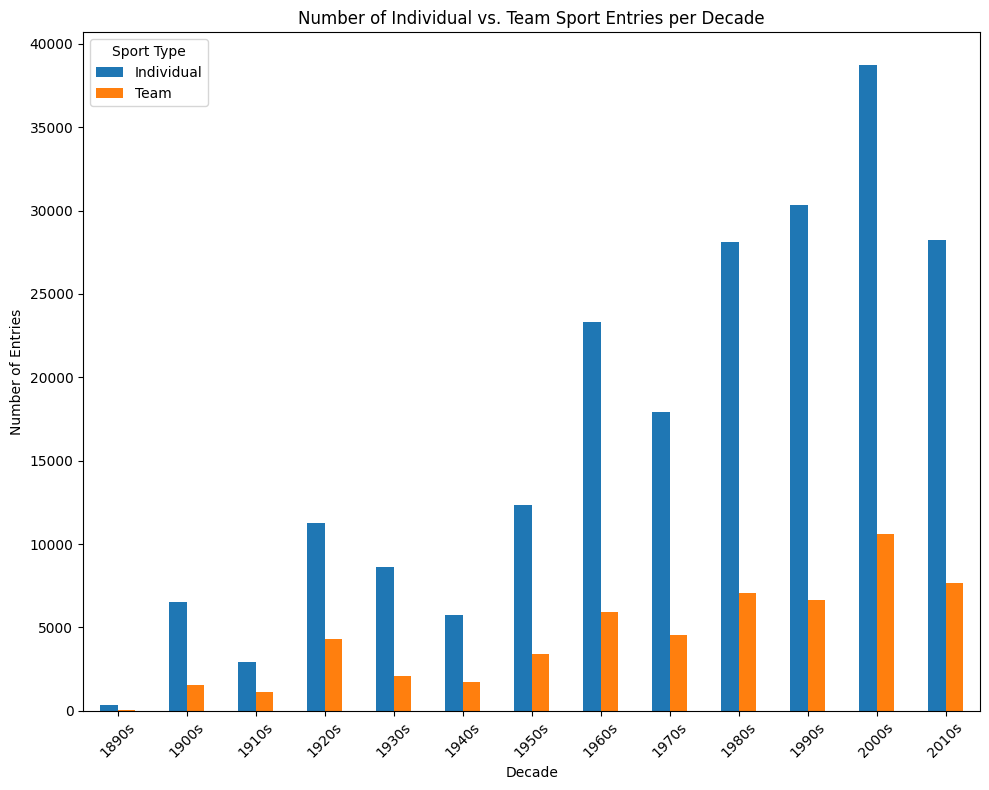

In [49]:
final_individual_df['Type'] = 'Individual'
final_team_df['Type'] = 'Team'

combined_df = pd.concat([final_individual_df, final_team_df])

combined_df['Decade'] = (combined_df['Year'] // 10) * 10

decade_sport_count = combined_df.groupby(['Decade', 'Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 8))
decade_sport_count.plot(kind='bar', ax=ax)

ax.set_xlabel('Decade')
ax.set_ylabel('Number of Entries')
ax.set_title('Number of Individual vs. Team Sport Entries per Decade')
ax.set_xticklabels([f'{int(x)}s' for x in decade_sport_count.index], rotation=45)

ax.legend(title='Sport Type')

plt.tight_layout()
plt.show()


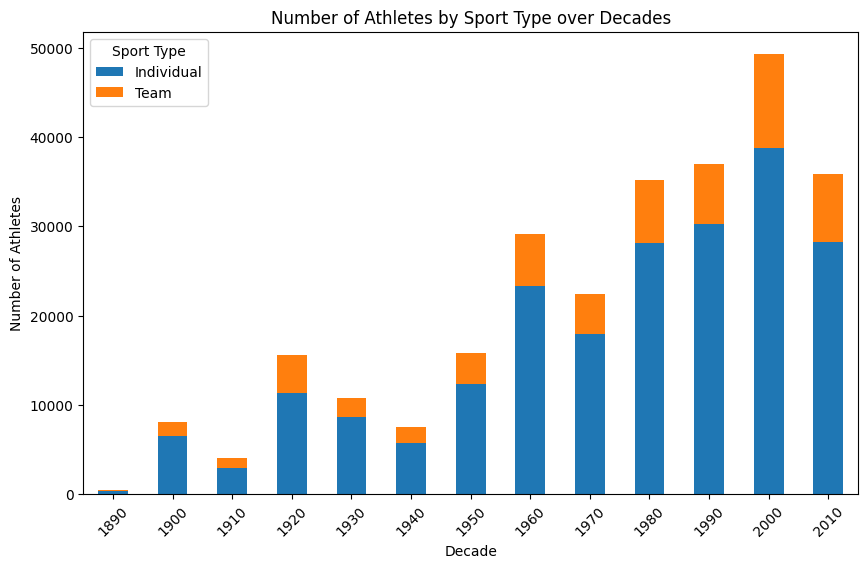

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
decade_sport_count.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Number of Athletes by Sport Type over Decades')
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.legend(title='Sport Type')
plt.show()


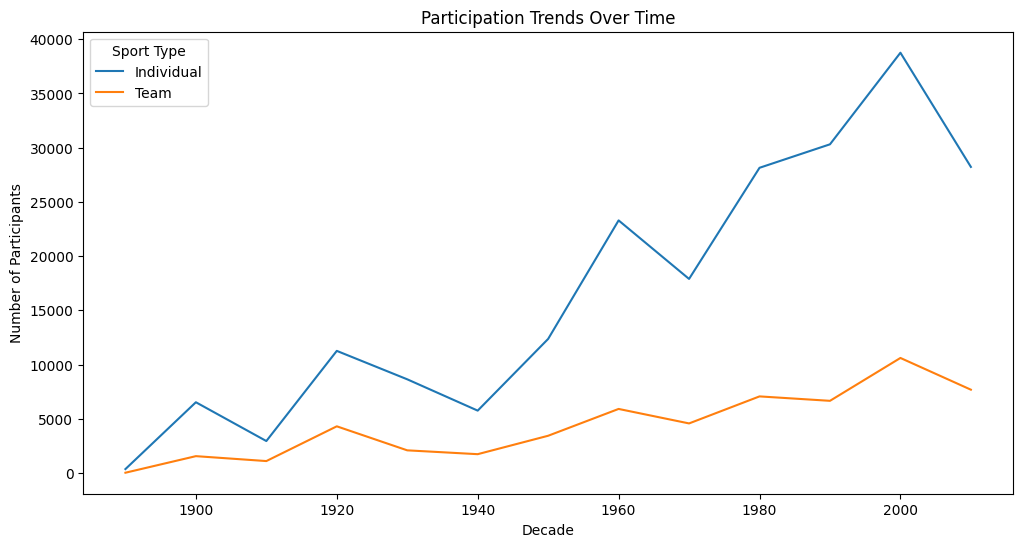

In [53]:
decade_type_counts = combined_df.groupby(['Decade', 'Type']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_type_counts, x='Decade', y='Count', hue='Type')
plt.title('Participation Trends Over Time')
plt.xlabel('Decade')
plt.ylabel('Number of Participants')
plt.legend(title='Sport Type')
plt.show()

In [34]:
athlete_events['Decade'] = (athlete_events['Year'] // 10) * 10
individual_sports = [...]
team_sports = [...]

athlete_events['Type'] = athlete_events['Sport'].apply(
    lambda x: 'Individual' if x in individual_sports else 'Team' if x in team_sports else 'Both'
)

decade_sport_count = athlete_events.groupby(['Decade', 'Type']).size().reset_index(name='Count')

type_distribution = athlete_events['Type'].value_counts()

athlete_events['Medal Won'] = athlete_events['Medal'].notnull()

country_decade_df = athlete_events.pivot_table(
    index='City', columns='Decade', values='Medal Won', aggfunc='sum'
)
country_decade_df = country_decade_df.fillna(0)
medal_count_data = athlete_events.groupby(['City', 'Decade', 'Type']).agg(
    Medal_Count=('Medal Won', 'sum'),
    Athlete_Count=('ID', 'nunique')
).reset_index()


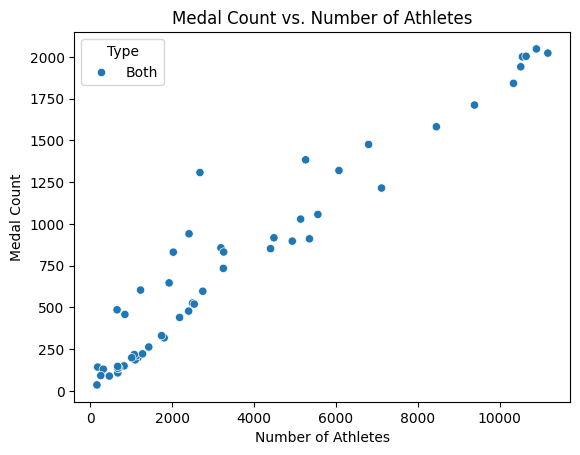

In [55]:
sns.scatterplot(data=medal_count_data, x='Athlete_Count', y='Medal_Count', hue='Type')
plt.title('Medal Count vs. Number of Athletes')
plt.xlabel('Number of Athletes')
plt.ylabel('Medal Count')
plt.show()


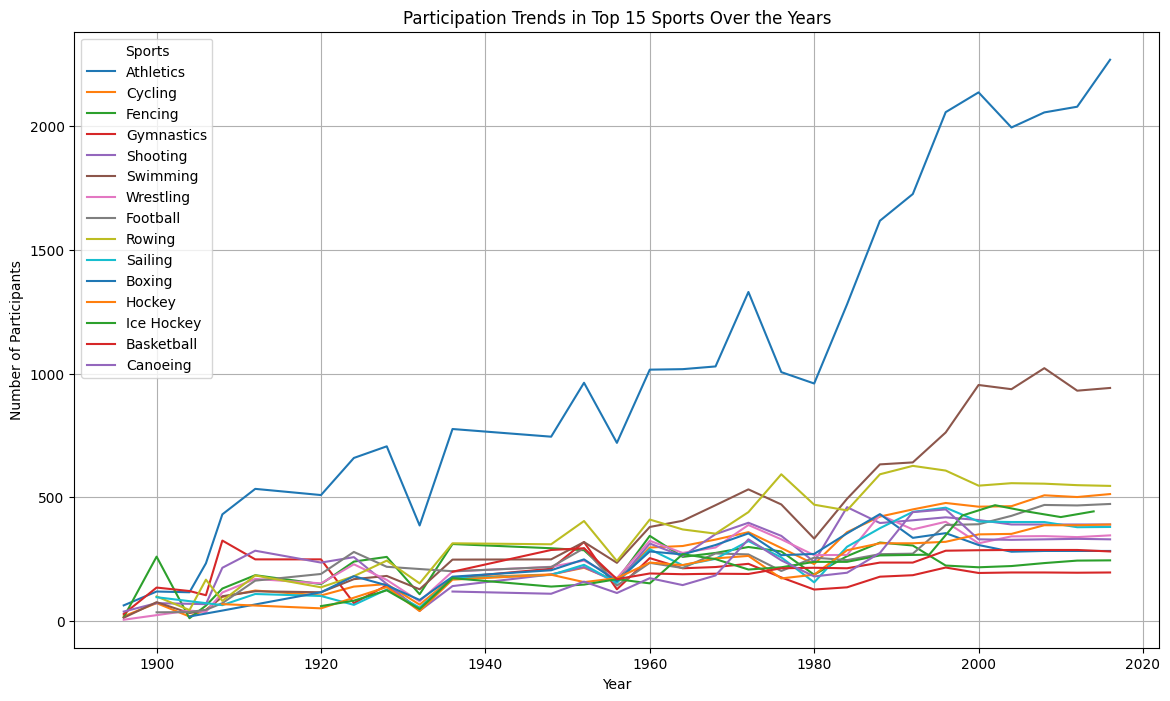

In [57]:
sports_participation = athlete_events.groupby(['Year', 'Sport'])['ID'].nunique().reset_index(name='Participants')
top_sports = sports_participation.groupby('Sport')['Participants'].sum().nlargest(15).index
filtered_sports_participation = sports_participation[sports_participation['Sport'].isin(top_sports)]

plt.figure(figsize=(14, 8))
for sport in filtered_sports_participation['Sport'].unique():
    sport_data = filtered_sports_participation[filtered_sports_participation['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Participants'], marker='', label=sport)

plt.title('Participation Trends in Top 15 Sports Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Sports')
plt.grid(True)
plt.show()


Numerical Results:
         Individual  Team
Medal                   
Bronze        8240  5055
Gold          8101  5271
Silver        7901  5215


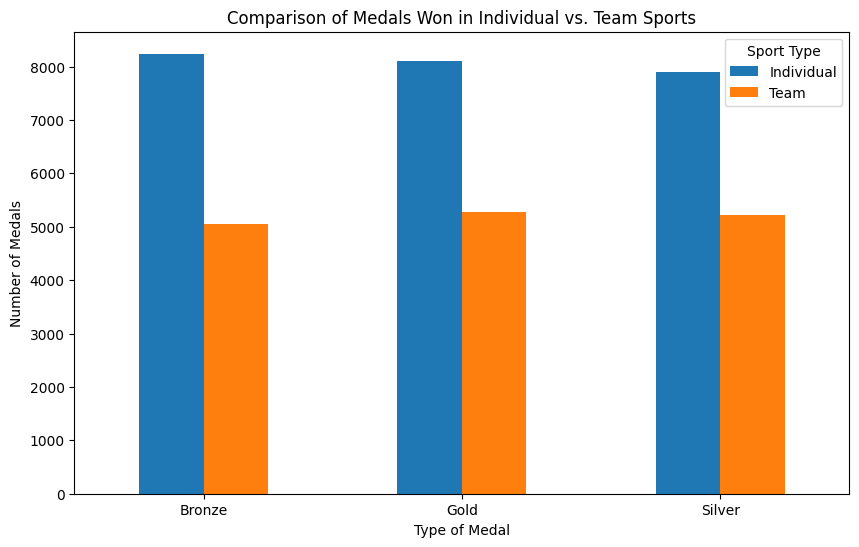

In [58]:
individual_medalists = final_individual_df.dropna(subset=['Medal'])
team_medalists = final_team_df.dropna(subset=['Medal'])

individual_medal_count = individual_medalists['Medal'].value_counts()
team_medal_count = team_medalists['Medal'].value_counts()
data = {
    'Individual': individual_medal_count,
    'Team': team_medal_count
}
df = pd.DataFrame(data).fillna(0)
df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Medals Won in Individual vs. Team Sports')
plt.xlabel('Type of Medal')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.legend(title='Sport Type')
plt.show()


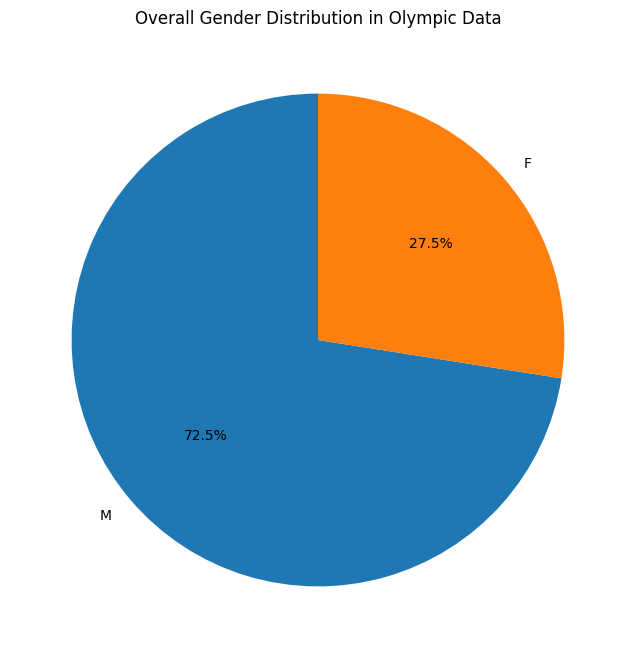

In [64]:
# Overall Gender Distribution
gender_distribution = combined_df['Sex'].value_counts()

# Plotting the pie chart for overall gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Gender Distribution in Olympic Data')
plt.show()


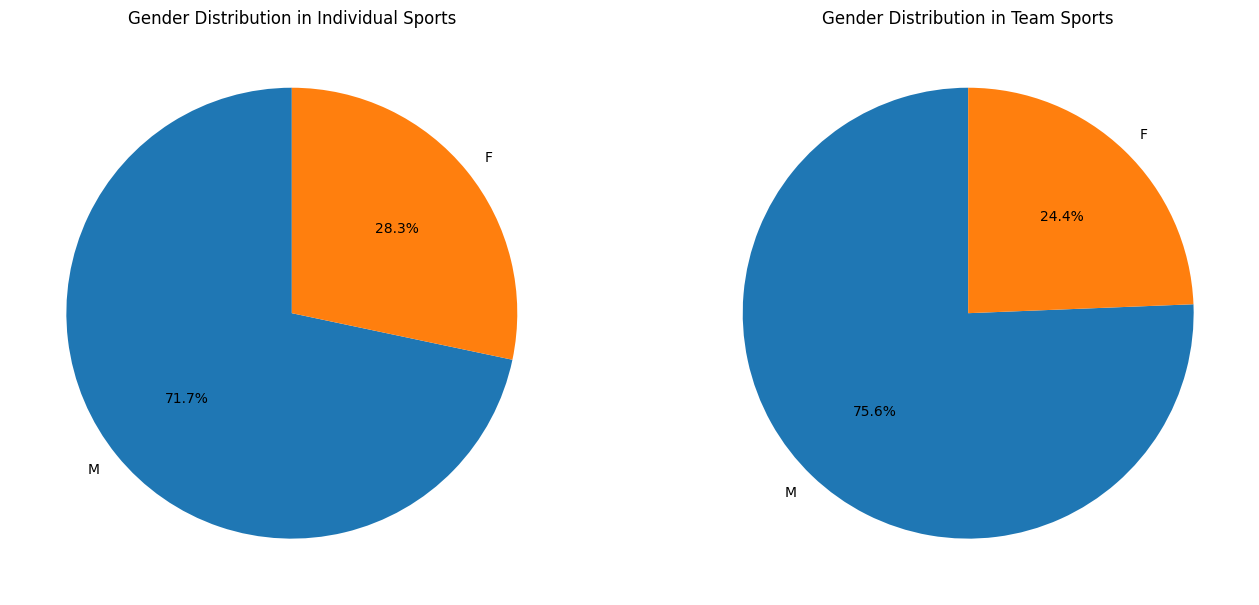

In [62]:
individual_gender_distribution = final_individual_df['Sex'].value_counts()

team_gender_distribution = final_team_df['Sex'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].pie(individual_gender_distribution, labels=individual_gender_distribution.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution in Individual Sports')

ax[1].pie(team_gender_distribution, labels=team_gender_distribution.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Gender Distribution in Team Sports')

plt.show()


Numerical Results:
 Medal  Bronze  Gold  Silver
Sex                        
F        3771  3747    3735
M        9524  9625    9381


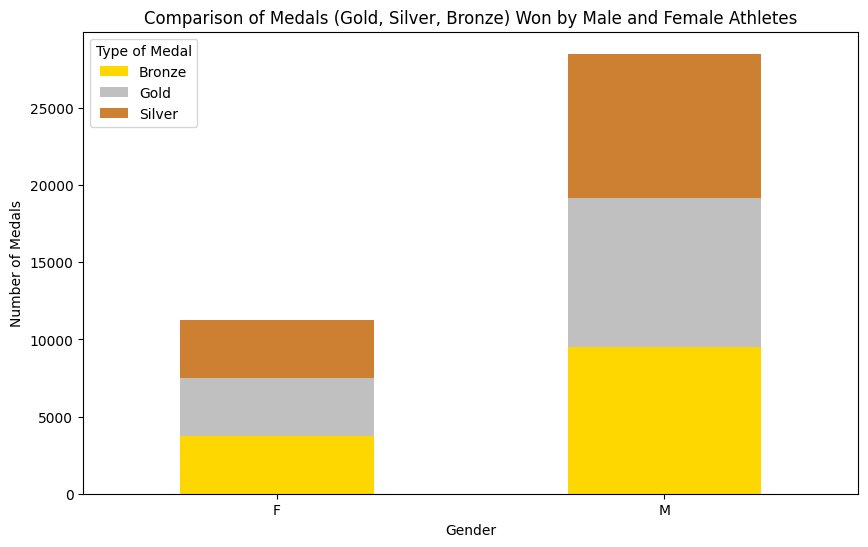

In [59]:
detailed_gender_medal_distribution = medalists.groupby(['Sex', 'Medal']).size().unstack().fillna(0)
colors = ['#FFD700', '#C0C0C0', '#CD7F32']
detailed_gender_medal_distribution.plot(kind='bar', stacked=True,color=colors, figsize=(10, 6))
plt.title('Comparison of Medals (Gold, Silver, Bronze) Won by Male and Female Athletes')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.legend(title='Type of Medal')
plt.show()


Numerical Results:
 Medal  Bronze  Gold  Silver
Sex                        
F        3771  3747    3735
M        9524  9625    9381


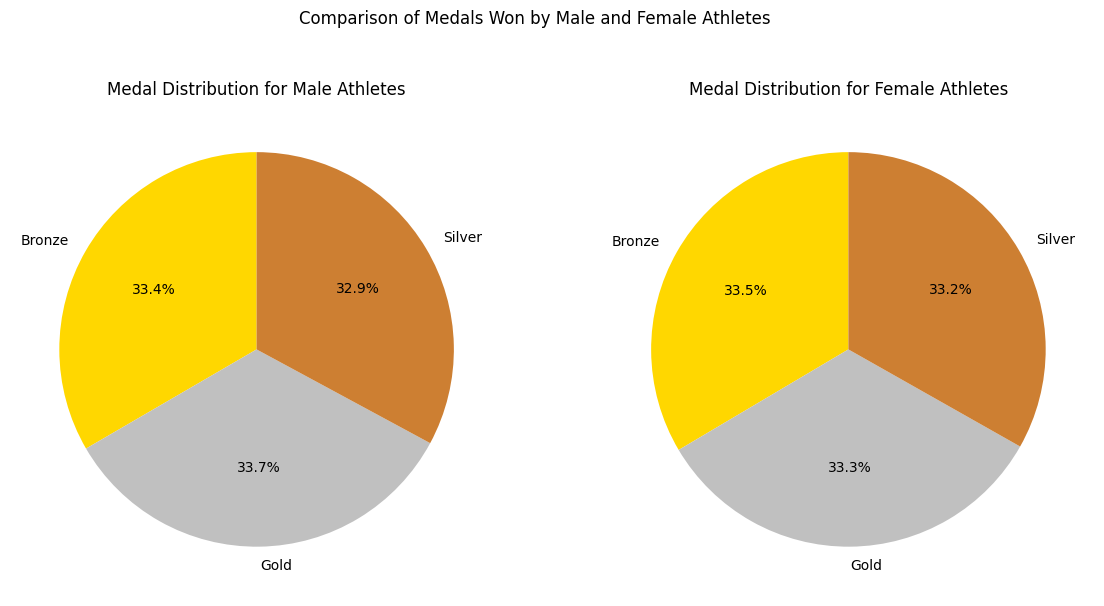

In [60]:
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(detailed_gender_medal_distribution.loc['M'], labels=detailed_gender_medal_distribution.columns, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Medal Distribution for Male Athletes')

axes[1].pie(detailed_gender_medal_distribution.loc['F'], labels=detailed_gender_medal_distribution.columns, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Medal Distribution for Female Athletes')

plt.suptitle('Comparison of Medals Won by Male and Female Athletes')
plt.show()
